In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


In [3]:
df_all = pd.read_csv("cleaned_feature_engineered_dataset.csv")
df = df_all[df_all["Stock"] == "TRENT.NS"]

In [4]:
df.head()

,Date,Stock,Open,High,Low,Close,Volume,SMA_50,Close_Lag_1,Close_Lag_3,Close_Lag_7,SMA_7,SMA_30,Daily_Pct_Change
2,2024-03-01,TRENT.NS,3898.575195,3926.256155,3855.704706,3921.309597,645099,6135.819924,3921.309597,3921.309597,3921.309597,5905.422104,6037.768073,0.583146
7,2024-03-04,TRENT.NS,3917.112549,3934.050879,3839.865499,3906.919591,291319,6135.819924,3921.309597,3921.309597,3921.309597,5905.422104,6037.768073,-0.260216
12,2024-03-05,TRENT.NS,3849.658691,3933.151454,3842.413662,3926.805710,549270,6135.819924,3906.919591,3921.309597,3921.309597,5905.422104,6037.768073,2.003996
17,2024-03-06,TRENT.NS,3869.345215,3891.180331,3747.678691,3873.792115,1009678,6135.819924,3926.805710,3921.309597,3921.309597,5905.422104,6037.768073,0.114926
22,2024-03-07,TRENT.NS,3949.490234,3975.272594,3837.667053,3887.332929,680535,6135.819924,3873.792115,3906.919591,3921.309597,5905.422104,6037.768073,-1.573806


In [8]:
df = df.copy()  # This ensures modifications do not affect the original DataFrame
df['Target'] = df['Close'].shift(-1)


In [9]:
df = df.dropna()

In [16]:
features = df.drop(columns=['Target', 'Date'])
features = features.select_dtypes(include=[np.number])  
target = df['Target']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)


In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}


In [19]:
model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [20]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4)

In [21]:
y_pred = best_model.predict(X_test)


In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, RMSE: {rmse}")


MAE: 60.000825009925485, RMSE: 78.93079789962628


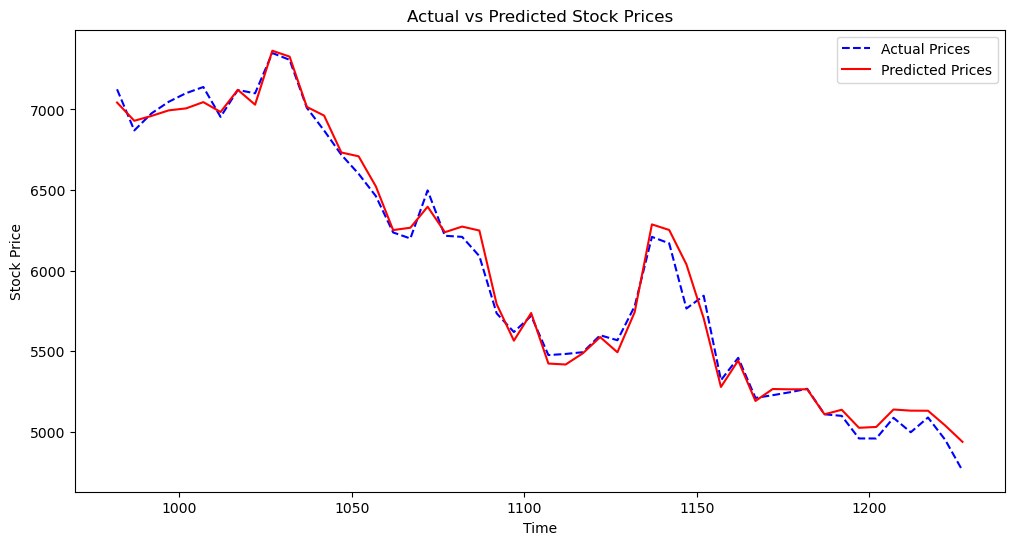

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color='blue', linestyle='dashed')
plt.plot(y_test.index, y_pred, label="Predicted Prices", color='red')

# Labels & Title
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()